<a href="https://colab.research.google.com/github/chengren/bky_hw_lab/blob/edu/PyBKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install libboost1.62-dev libboost-mpi-python1.62-dev libboost1.62-tools-dev libboost1.62-all-dev libboost-mpi-python1.62.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libboost-mpi-python1.62-dev is already the newest version (1.62.0+dfsg-5).
libboost-mpi-python1.62.0 is already the newest version (1.62.0+dfsg-5).
libboost1.62-all-dev is already the newest version (1.62.0+dfsg-5).
libboost1.62-dev is already the newest version (1.62.0+dfsg-5).
libboost1.62-tools-dev is already the newest version (1.62.0+dfsg-5).
The following packages were automatically installed and are no longer required:
  libboost-atomic1.65.1 libboost-chrono1.65.1 libboost-container1.65.1
  libboost-context1.65.1 libboost-coroutine1.65.1 libboost-date-time1.65.1
  libboost-fiber1.65.1 libboost-filesystem1.65.1 libboost-graph-parallel1.65.1
  libboost-graph1.65.1 libboost-iostreams1.65.1 libboost-locale1.65.1
  libboost-log1.65.1 libboost-math1.65.1 libboost-mpi1.65.1 libboost-numpy-dev
  libboost-numpy1.65-dev libboost-numpy1.65.1 libboost-program-options1.65.1
  libboost-python1.65.1

In [2]:
!git clone https://github.com/CAHLR/pyBKT.git

fatal: destination path 'pyBKT' already exists and is not an empty directory.


In [3]:
%cd /content/pyBKT

/content/pyBKT


In [4]:
!wget --no-check-certificate http://bitbucket.org/eigen/eigen/get/3.1.3.tar.gz
!tar -xzvf 3.1.3.tar.gz
!mv eigen-eigen-2249f9c22fe8 ./Eigen
!rm 3.1.3.tar.gz



URL transformed to HTTPS due to an HSTS policy
--2020-02-18 01:05:05--  https://bitbucket.org/eigen/eigen/get/3.1.3.tar.gz
Resolving bitbucket.org (bitbucket.org)... 18.205.93.2, 18.205.93.1, 18.205.93.0, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1348611 (1.3M) [application/x-tar-gz]
Saving to: ‘3.1.3.tar.gz’

3.1.3.tar.gz        100%[===================>]   1.29M  7.17MB/s    in 0.2s    

2020-02-18 01:05:06 (7.17 MB/s) - ‘3.1.3.tar.gz’ saved [1348611/1348611]

eigen-eigen-2249f9c22fe8/.hg_archival.txt
eigen-eigen-2249f9c22fe8/.hgeol
eigen-eigen-2249f9c22fe8/.hgignore
eigen-eigen-2249f9c22fe8/.hgtags
eigen-eigen-2249f9c22fe8/.krazy
eigen-eigen-2249f9c22fe8/CMakeLists.txt
eigen-eigen-2249f9c22fe8/COPYING.BSD
eigen-eigen-2249f9c22fe8/COPYING.GPL
eigen-eigen-2249f9c22fe8/COPYING.LGPL
eigen-eigen-2249f9c22fe8/COPYING.MINPACK
eigen-eigen-2249f9c22fe8/COPYING.MPL2
eigen-eigen-2249f9c22fe8/COPYING.REA

In [5]:
!make

generating data...
fitting! each dot is a new EM initialization

	truth	learned
prior	0.1000	0.1012
learn1	0.3000	0.2818
forget1	0.0000	0.0000
guess1	0.1000	0.0995
slip1	0.0300	0.0287


In [0]:
#!python test/assistments_train.py #TODO: modify pre-procesd

In [7]:
%cd /content
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

from pyBKT.util.data_helper import assistments_data
from pyBKT.generate import random_model_uni
from pyBKT.fit import EM_fit

from sklearn.model_selection import train_test_split
from pyBKT.fit import predict_onestep
from sklearn.metrics import accuracy_score

/content


In [0]:
skills = ['Equation Solving Two or Fewer Steps',
          'Percent Of',
          'Addition and Subtraction Integers',
          'Conversion of Fraction Decimals Percents',
          'Volume Rectangular Prism']

In [9]:
data = {}
for skill in skills:
    raw_data = assistments_data(skill)
    last_length = len(raw_data['resources']) - np.sum(raw_data['lengths'])
    raw_data['lengths'] = np.append(raw_data['lengths'], [last_length])
    raw_data['starts'] = np.append(raw_data['starts'], [len(raw_data['resources']) - last_length + 1])
    data[skill] = raw_data

Equation Solving Two or Fewer Steps


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Percent Of
Addition and Subtraction Integers
Conversion of Fraction Decimals Percents
Volume Rectangular Prism


In [10]:
num_fit_initializations = 10
num_resources = 1
num_subparts = 1
best_models = {}

for skill in skills:
    best_likelihood = float("-inf")
    for i in range(num_fit_initializations):
        fitmodel = random_model_uni.random_model_uni(num_resources, num_subparts)
        (fitmodel, log_likelihoods) = EM_fit.EM_fit(fitmodel, data[skill])
        if(log_likelihoods[-1] > best_likelihood):
            best_likelihood = log_likelihoods[-1]
            best_models[skill] = fitmodel
            print(skill, 'best likelihood', best_likelihood)

Equation Solving Two or Fewer Steps best likelihood [-10475.05203955]
Equation Solving Two or Fewer Steps best likelihood [-10475.05185363]
Equation Solving Two or Fewer Steps best likelihood [-10475.05153689]
Equation Solving Two or Fewer Steps best likelihood [-10475.05151476]
Equation Solving Two or Fewer Steps best likelihood [-10475.05138944]
Percent Of best likelihood [-5765.06870855]
Percent Of best likelihood [-5765.06835611]
Percent Of best likelihood [-5765.06834689]
Percent Of best likelihood [-5765.06795088]
Addition and Subtraction Integers best likelihood [-7822.35350932]
Addition and Subtraction Integers best likelihood [-7822.35339174]
Addition and Subtraction Integers best likelihood [-7822.35336073]
Conversion of Fraction Decimals Percents best likelihood [-11517.21861823]
Conversion of Fraction Decimals Percents best likelihood [-11517.21774339]
Volume Rectangular Prism best likelihood [-384.62515306]


In [0]:
priors = []
learns = []
guesses = []
slips = []
for skill in skills:
    model = best_models[skill]
    priors.append(model['prior'])
    learns.append(model['learns'][0])
    guesses.append(model['guesses'][0])
    slips.append(model['slips'][0])

# Analysis 1 Which skills had high vs low learning rates?

In [12]:
pd.Series(learns, index=skills).sort_values(ascending=False)

Percent Of                                  0.116356
Equation Solving Two or Fewer Steps         0.038023
Conversion of Fraction Decimals Percents    0.014927
Addition and Subtraction Integers           0.009234
Volume Rectangular Prism                    0.000013
dtype: float64

This result makes some sense. Percent Of is an easy task, so it had high learning rate, while Volume Rectangular Prism is not easy, resulting in a low learning rate.

# Analysis 2 Did the learning rates correlate with the prior knowledge values?

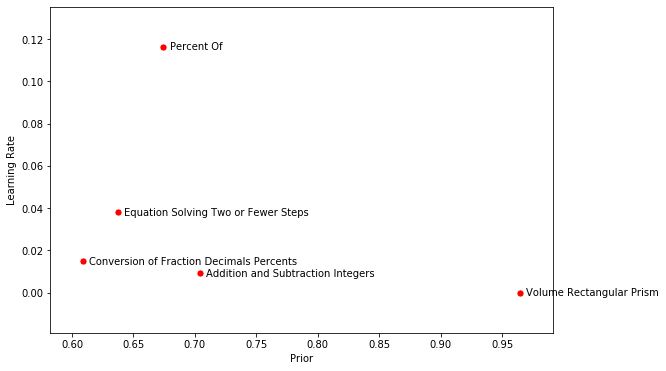

In [13]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=priors, y=learns, s=50, color='r')
plt.xlabel('Prior')
plt.ylabel('Learning Rate')
for i in range(len(skills)):
    plt.text(x=priors[i]+5e-3, y=learns[i], s=skills[i],
             verticalalignment='center', horizontalalignment='left')

There seems no correlation between learning rates and prior knowledge.

# Analysis 3 Is a skill harder if its guess is high or if its slip is low?

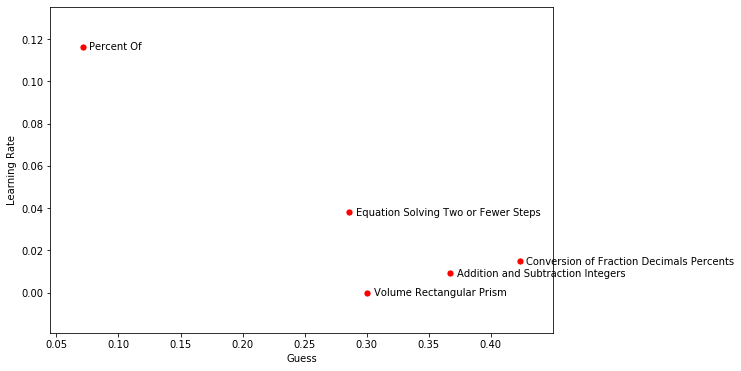

In [14]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=guesses, y=learns, s=50, color='r')
plt.xlabel('Guess')
plt.ylabel('Learning Rate')
for i in range(len(skills)):
    plt.text(x=guesses[i]+5e-3, y=learns[i], s=skills[i],
             verticalalignment='center', horizontalalignment='left')

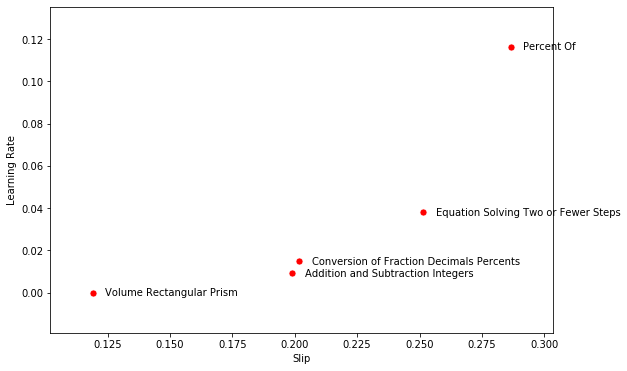

In [15]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=slips, y=learns, s=50, color='r')
plt.xlabel('Slip')
plt.ylabel('Learning Rate')
for i in range(len(skills)):
    plt.text(x=slips[i]+5e-3, y=learns[i], s=skills[i],
             verticalalignment='center', horizontalalignment='left')

As seen from the plots, there are two patterns. The learning rate is lower (which means the skill is harder) if the guess is high and if the slip is low.

# Analysis 4 Any other question(s) you have that can be answered with these BKT results?

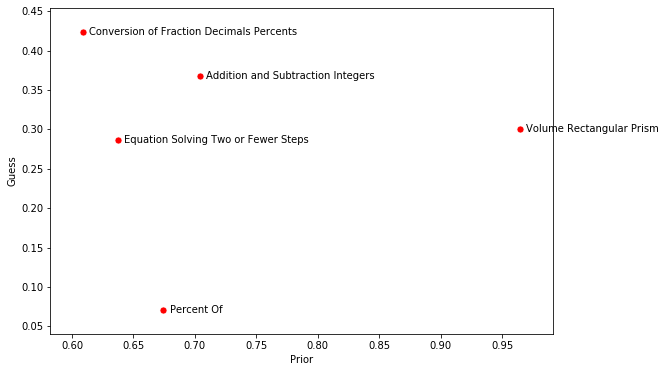

In [16]:
plt.figure(figsize=(9,6))
sns.scatterplot(x=priors, y=guesses, s=50, color='r')
plt.xlabel('Prior')
plt.ylabel('Guess')
for i in range(len(skills)):
    plt.text(x=priors[i]+5e-3, y=guesses[i], s=skills[i],
             verticalalignment='center', horizontalalignment='left')

Are the guesses correlated with priors? The answer is probably no from the plot above.

# Extra Credit #1 Individualized BKT

In [0]:
skill_to_check = 'Percent Of'
individualized_data = deepcopy(data[skill_to_check])
new_resources = individualized_data['resources']
for i in range(len(individualized_data['lengths'])):
    start = individualized_data['starts'][i] - 1
    end = start + individualized_data['lengths'][i]
    new_resources[start:end] = i + 1
    individualized_data['resources'] = new_resources

In [18]:
num_fit_initializations = 10
num_subparts = 1
num_resources = individualized_data['resources'][-1]

best_individualized_model = None
best_likelihood = float("-inf")

for i in range(num_fit_initializations):
    fitmodel = random_model_uni.random_model_uni(num_resources, num_subparts)
    (fitmodel, log_likelihoods) = EM_fit.EM_fit(fitmodel, individualized_data)
    if(log_likelihoods[-1] > best_likelihood):
        best_likelihood = log_likelihoods[-1]
        best_individualized_model = fitmodel
        print(best_likelihood)

[-5238.89379614]
[-5233.78716633]
[-5233.37655715]


In [19]:
best_individualized_model['learns'].mean()

0.5768603337774414

In [20]:
best_individualized_model['learns'].std()

0.3976334519754528

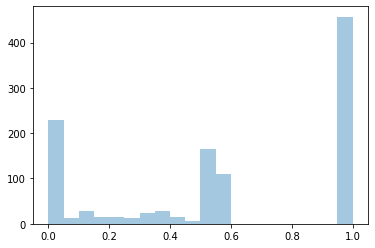

In [21]:
sns.distplot(best_individualized_model['learns'], bins=20, kde=False);

# Extra Credit #2 BKT Accuracy of your predictions

In [0]:
def assistments_data_v2(dataset, skill_name):
  
  import pandas as pd
  import numpy as np
  import io
  import requests
  
  print(skill_name)
  #url = "https://drive.google.com/uc?export=download&id=0B3f_gAH-MpBmUmNJQ3RycGpJM0k"
  #s = requests.get(url).content
  # df = pd.read_csv(io.BytesIO(s))
  #df = pd.read_csv(io.StringIO(s.decode('latin')))
  # df = pd.read_csv(io.StringIO(s.decode('latin')), names = ['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id', 'original', 'correct', 'attempt_count', 'ms_first_response', 'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id', 'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name', 'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time', 'template_id', 'answer_id', 'answer_text', 'first_action', 'bottom_hint', 'opportunity', 'opportunity_original'])
  # filter by the skill you want, make sure the question is an 'original'
  # skills = df["skill_name"]
  # for skill_name in skills:
  skill = dataset[(dataset["skill_name"]==skill_name)]
  # sort by the order in which the problems were answered
  dataset["order_id"] = [int(i) for i in dataset["order_id"]]
  dataset.sort_values("order_id", inplace=True)
  
  # example of how to get the unique users
  # uilist=skill['user_id'].unique()

  # convert from 0=incorrect,1=correct to 1=incorrect,2=correct
  skill.loc[:,"correct"]+=1
  
  # filter out garbage
  df3=skill[skill["correct"]!=3]
  data=df3["correct"].values
  
  # find out how many problems per user, form the start/length arrays
  steps=df3.groupby("user_id")["problem_id"].count().values
  lengths=np.copy(steps)
  # print("steps", steps)
  steps[0]=0
  steps[1]=1
  for i in range(2,steps.size):
    steps[i]=steps[i-1]+lengths[i-2]
  
  starts=np.delete(steps,0)

  resources=[1]*data.size
  resource=np.asarray(resources)
  
  stateseqs=np.copy(resource)
  lengths=np.resize(lengths,lengths.size-1)
  Data={}
  Data["stateseqs"]=np.asarray([stateseqs],dtype='int32')
  Data["data"]=np.asarray([data],dtype='int32')
  Data["starts"]=np.asarray(starts)
  Data["lengths"]=np.asarray(lengths)
  Data["resources"]=resource
  
  return (Data)

In [59]:
filepath='https://drive.google.com/uc?export=download&id=0B3f_gAH-MpBmUmNJQ3RycGpJM0k'
df = pd.read_csv(filepath,encoding='ISO-8859-1')
df_2=df[df["original"] == 1]
train,test= train_test_split(df_2, test_size=0.5, random_state=42)
print(len(test), len(test))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


164146 164146


In [60]:
equ_train = assistments_data_v2(train,'Equation Solving Two or Fewer Steps')
equ_test = assistments_data_v2(test,'Equation Solving Two or Fewer Steps')
print(len(equ_train['data'][0]),"\n",len(equ_train['data'][0]))

Equation Solving Two or Fewer Steps
Equation Solving Two or Fewer Steps


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

8760 
 8760


In [61]:
fitmodel = random_model_uni.random_model_uni(1,1)
(fitmodel_train, log_likelihoods_train) = EM_fit.EM_fit(fitmodel, equ_train)
print(fitmodel_train,log_likelihoods_train[1:10])

{'prior': 0.8998947818273049, 'learns': array([0.29264947]), 'forgets': array([0.]), 'guesses': array([0.59044483]), 'slips': array([0.35300591]), 'As': array([[[0.70735053, 0.        ],
        [0.29264947, 1.        ]]]), 'emissions': array([[[0.40955517, 0.59044483],
        [0.35300591, 0.64699409]]]), 'pi_0': array([[0.10010522],
       [0.89989478]])} [[-5689.5853521 ]
 [-5684.37037221]
 [-5682.36827561]
 [-5681.36658002]
 [-5680.78353499]
 [-5680.40944962]
 [-5680.15269756]
 [-5679.96760685]
 [-5679.82912409]]


In [0]:
pred = predict_onestep.run(fitmodel_train,equ_test)

In [63]:
pred_1 = pd.core.series.Series(pred[0]).apply(lambda x : 1 if ( x >= 0.5) else 0)+1
pred_1

0       2
1       2
2       2
3       2
4       2
       ..
8546    1
8547    2
8548    1
8549    2
8550    1
Length: 8551, dtype: int64

In [64]:
accuracy_score(pred_1,equ_test['data'][0])

0.6455385335048532

If I use a student hold-out strategy with BKT to choose 50% of students in "Equation Solving Two or Fewer Steps" to train the model and then the other 50% of students to predict using pyBKT's fit.predict_onestep, The Accuracy of your predictions is 64.5%